In [57]:
!pip install scikeras

In [101]:
!pip install tensorflow

In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from google.colab import files
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [5]:
upload=files.upload()

Saving forestfires (1).csv to forestfires (1) (1).csv


In [262]:
data=pd.read_csv('forestfires (1).csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [275]:
data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [263]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [264]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [268]:
data.drop('month',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

In [269]:
data.describe().style.background_gradient(cmap='Accent_r')

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [274]:
px.bar(x=data['size_category'])

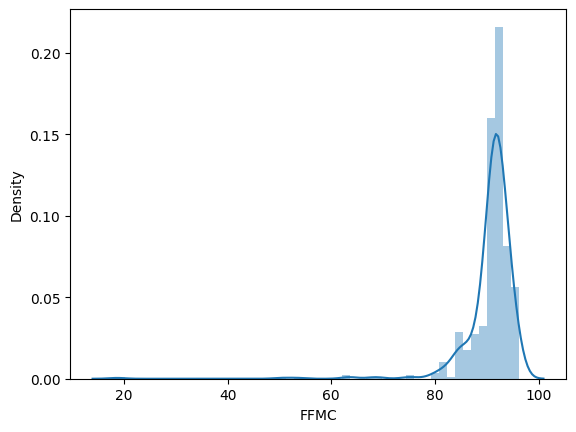

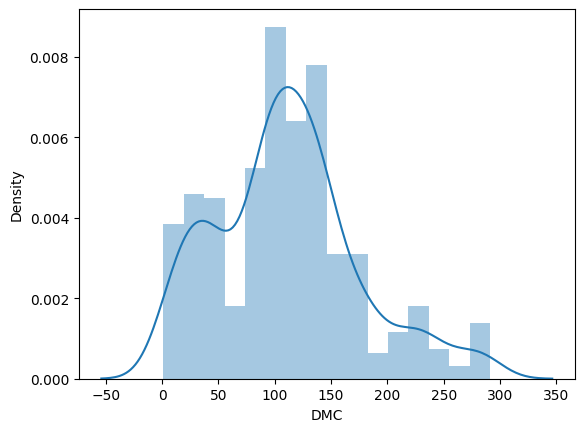

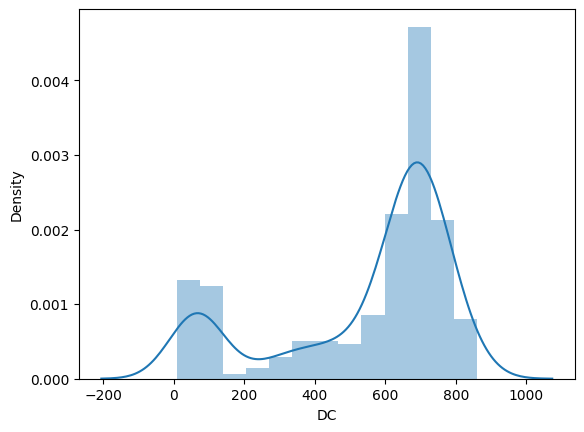

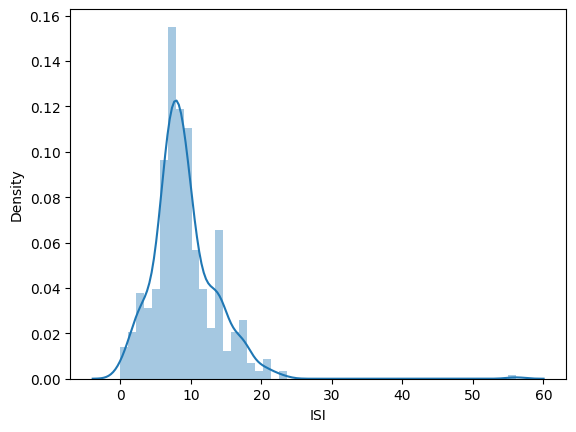

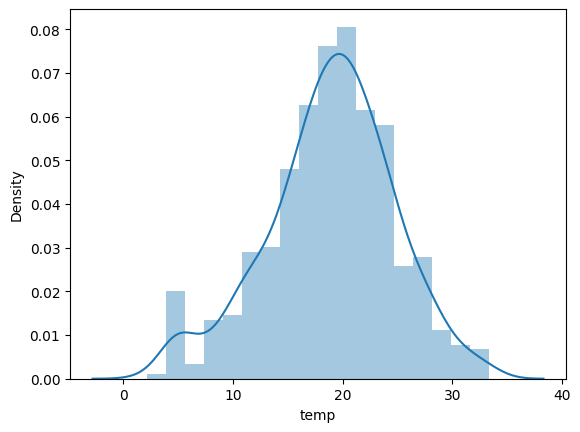

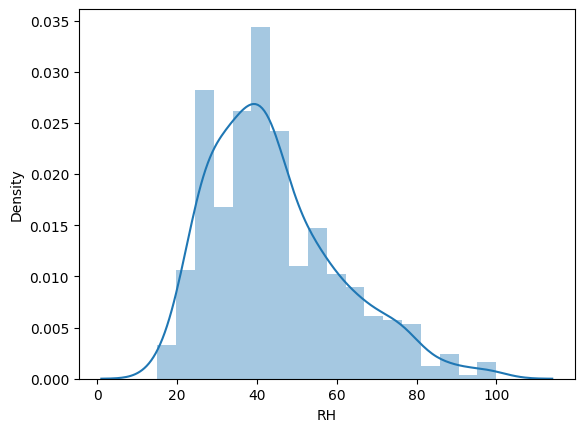

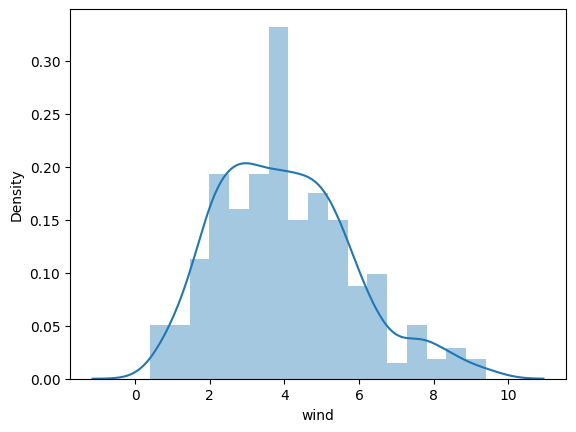

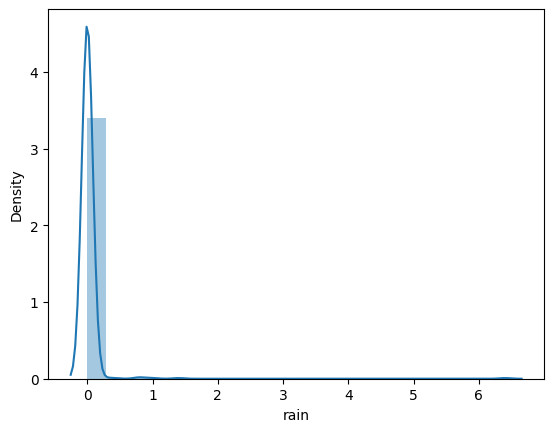

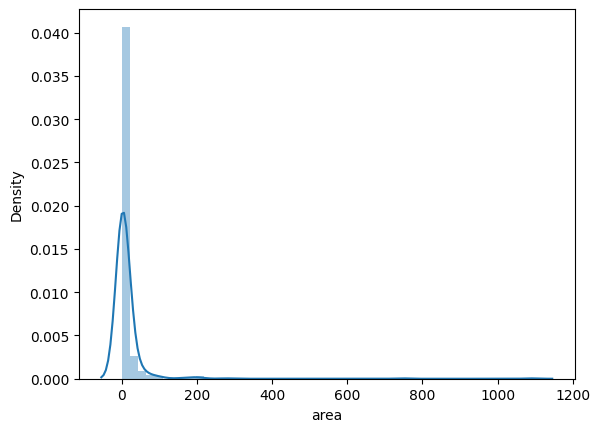

In [278]:
columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
#plt.set(rc={'figure.figsize'=(14,15)})
for i in columns:
  plt.figure()
  sns.distplot(data[i])

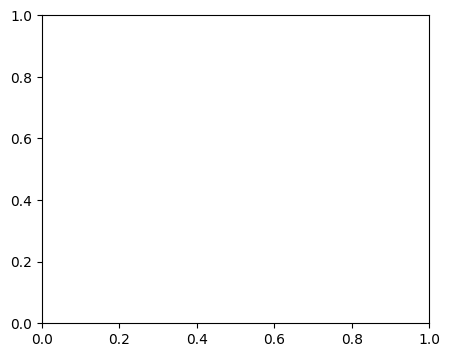

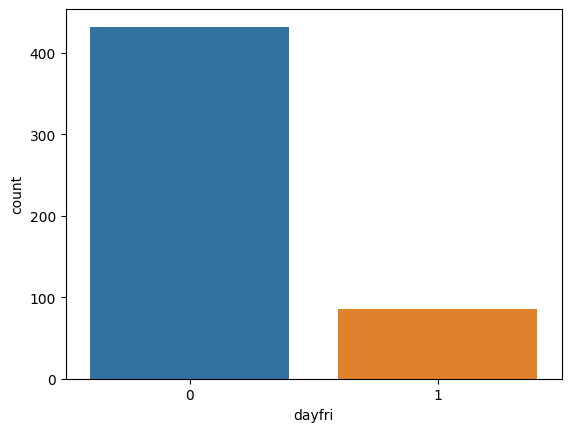

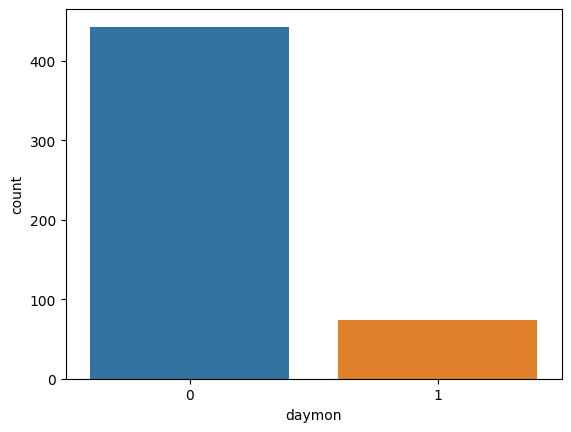

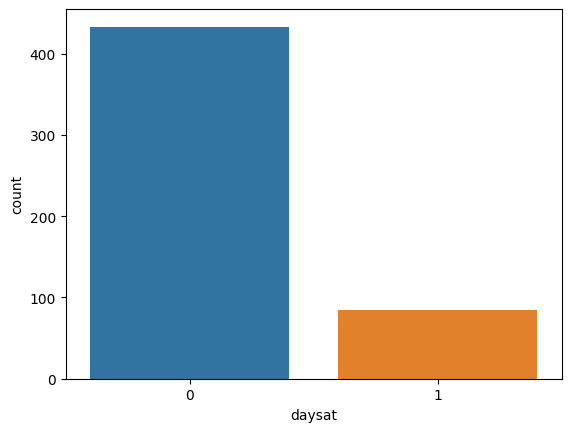

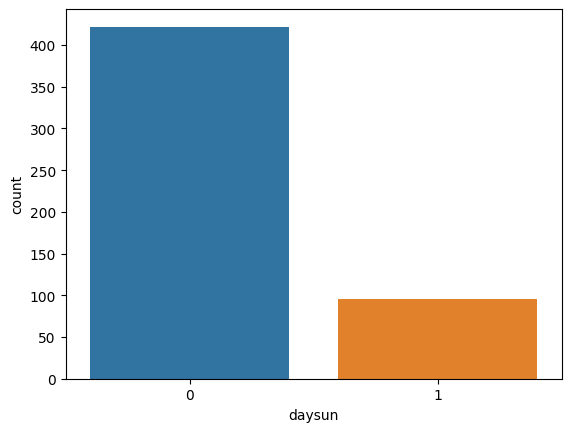

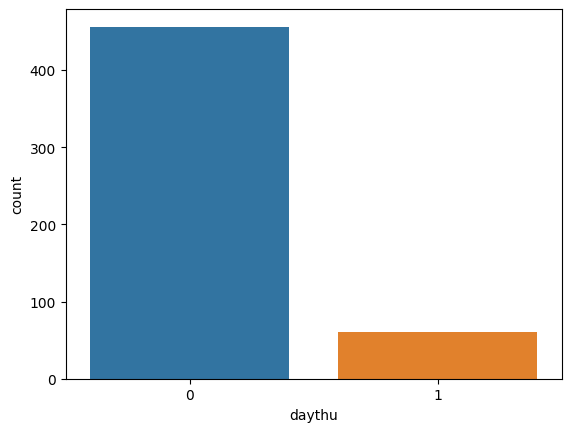

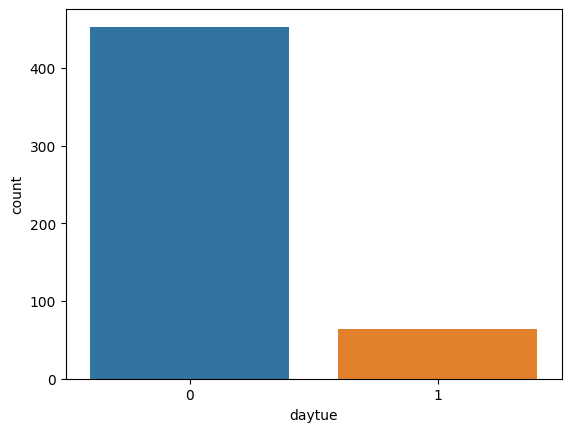

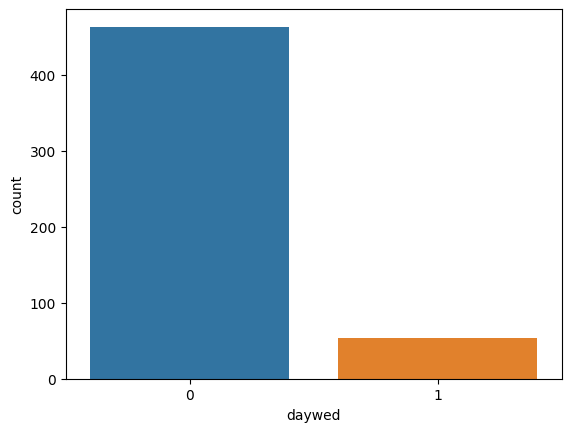

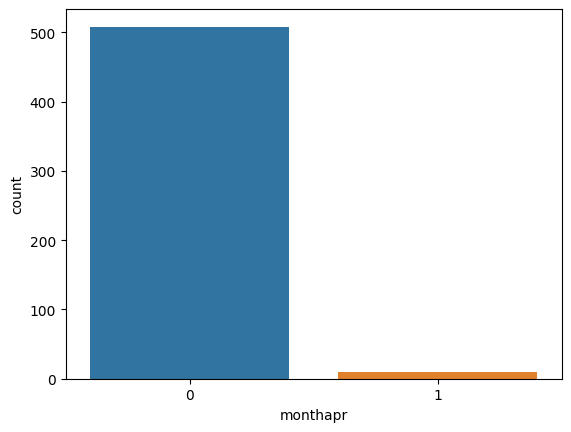

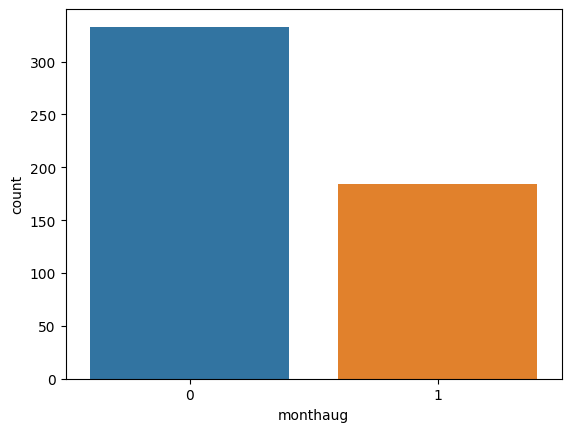

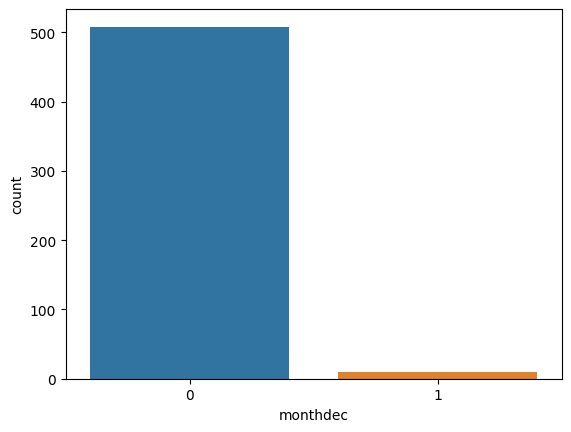

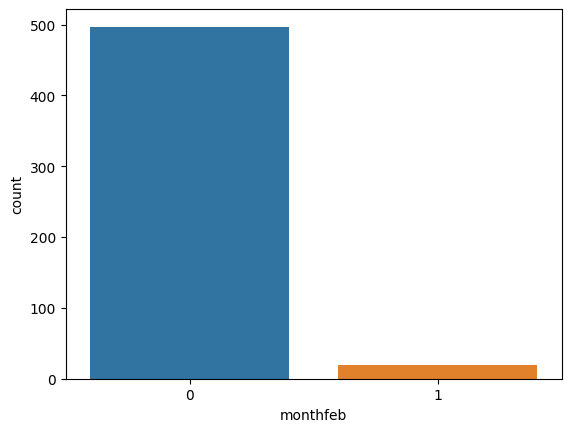

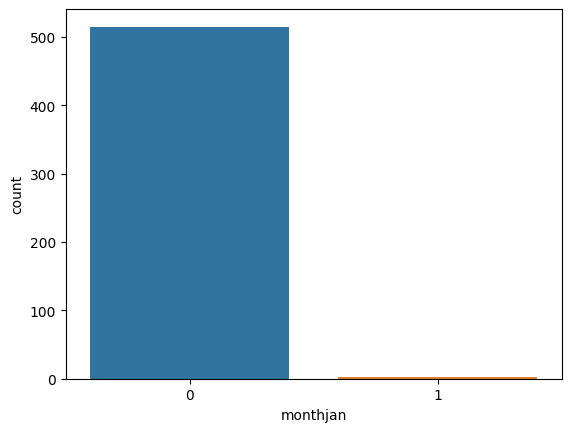

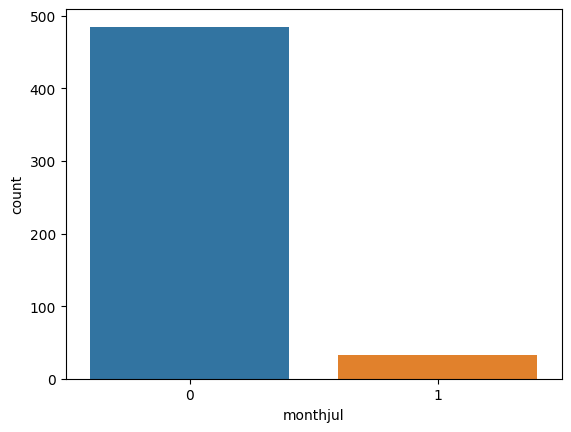

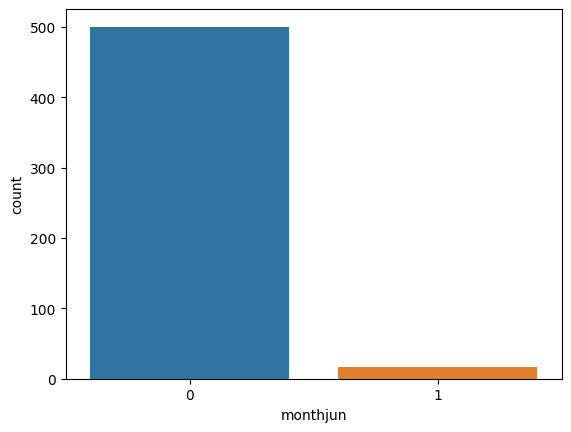

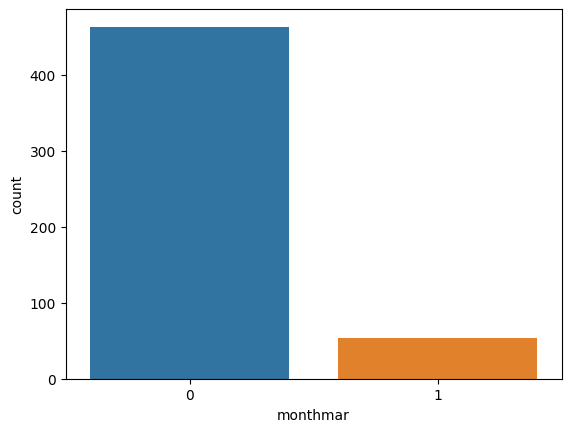

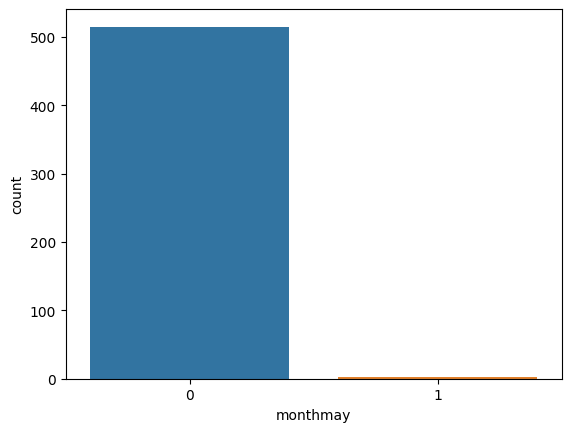

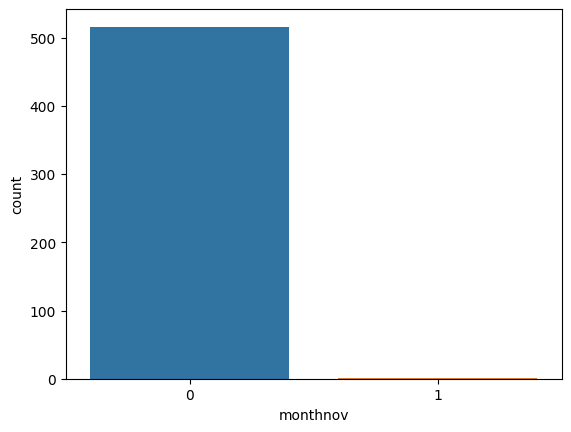

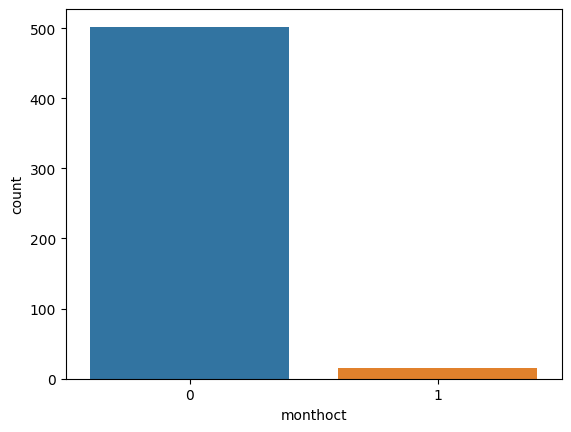

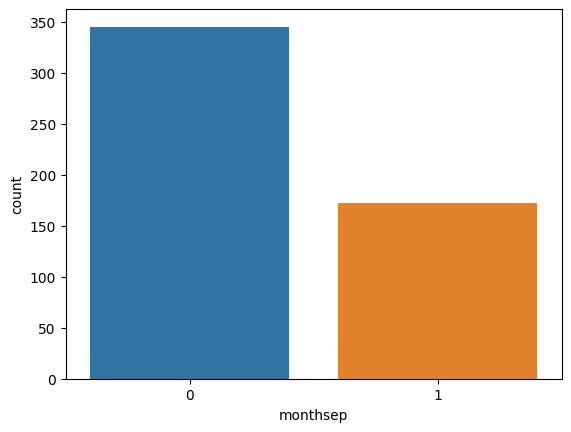

In [284]:
columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
fig,ax=plt.subplots(figsize=(5,4))
for i in columns:
  plt.figure()
  sns.countplot(x=data[i])

0-->small
1-->large

In [302]:
fig=px.strip(data,x='size_category',y='area',color='size_category')
fig.show()

In [303]:
fig=px.strip(data,x='size_category',y='temp',color='size_category')
fig.show()

In [305]:
fig=px.pie(data,values='rain',names='size_category',hover_data=['rain','size_category'],labels={'rain','size_category'})
fig.show()

In [285]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['size_category']=le.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [291]:
corr=data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


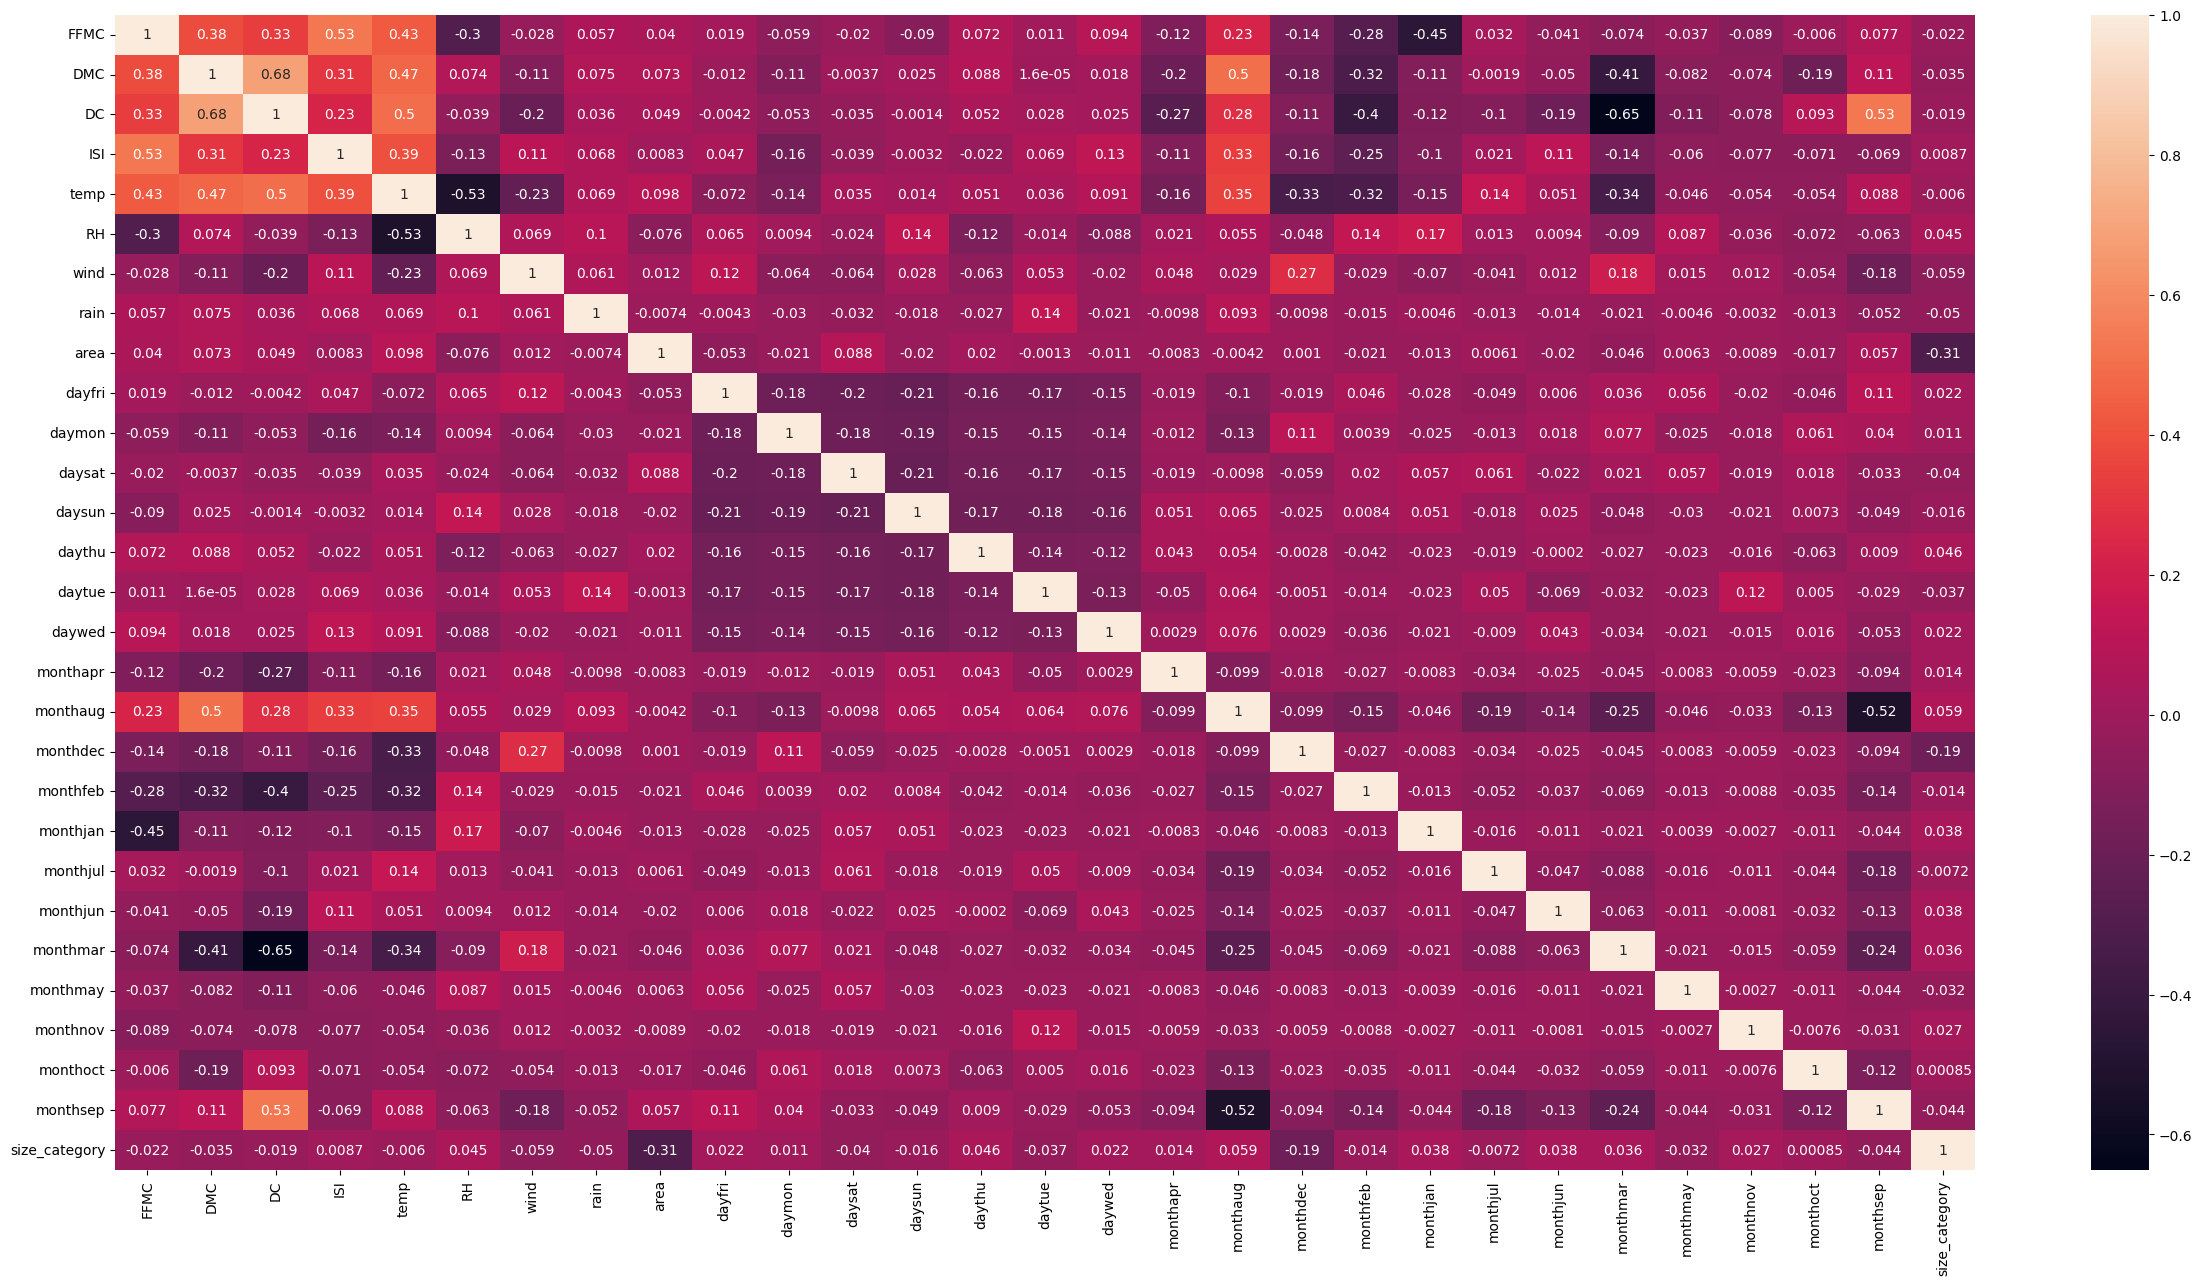

In [290]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True)
plt.show()

In [63]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

**Feature Engineering and Splitting the data**

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [80]:
x_train.shape,x_test.shape

((361, 28), (156, 28))

In [81]:
y_train.shape,y_test.shape

((361,), (156,))

**Balancing the data**

In [84]:
from imblearn.over_sampling import SMOTE
model=SMOTE(random_state=20)
x_train_st,y_train_st=model.fit_resample(x_train,np.array(y_train).ravel())
x_train_st,y_train_st

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    90.100000   39.700000   86.600000   6.200000  16.100000  29  3.100000   
 1    88.800000  147.300000  614.500000   9.000000  17.300000  43  4.500000   
 2    91.600000  273.800000  819.100000   7.700000  21.300000  44  4.500000   
 3    96.200000  175.500000  661.800000  16.800000  32.600000  26  3.100000   
 4    91.500000  130.100000  807.100000   7.500000  21.300000  35  2.200000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 521  91.585139  115.712485  674.117635   7.990093  18.888969  44  1.946830   
 522  91.138650   92.459511  740.534972   7.663804  19.192636  46  3.550308   
 523  87.632357   11.160328   26.845293   7.177243   9.812733  38  6.245513   
 524  94.399657  199.888409  707.838683  12.113855  27.592387  27  4.345679   
 525  95.034044  140.992206  604.750204  17.557096  26.092206  34  3.671452   
 
      rain        area  dayfri  ...  monthdec  mon

In [85]:
x_train_st.shape,y_train_st.shape

((526, 28), (526,))

In [86]:
x_train=x_train_st.copy()
y_train=y_train_st.copy()

In [87]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.92129032, 0.13301172, 0.09229506, ..., 0.        , 0.        ,
        0.        ],
       [0.90451613, 0.50379049, 0.71138736, ..., 0.        , 0.        ,
        0.        ],
       [0.94064516, 0.93969676, 0.95133107, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.88944977, 0.03466688, 0.022218  , ..., 0.        , 0.        ,
        0.        ],
       [0.97676977, 0.68500486, 0.82084987, ..., 0.        , 0.        ,
        0.        ],
       [0.98495541, 0.48205447, 0.69995333, ..., 0.        , 0.        ,
        0.        ]])

In [88]:
X_test = scale.fit_transform(x_test)
x_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
150,92.5,56.4,433.3,7.1,23.2,39,5.4,0.0,1.19,1,...,0,0,0,0,1,0,0,0,0,0
491,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
481,93.2,114.4,560.0,9.5,30.2,22,4.9,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
34,91.8,78.5,724.3,9.2,21.2,32,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
349,92.1,99.0,745.3,9.6,12.8,64,3.6,0.0,1.64,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,94.3,85.1,692.3,15.9,25.9,24,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
108,92.5,88.0,698.6,7.1,20.3,45,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
105,85.9,19.5,57.3,2.8,12.7,52,6.3,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
187,90.9,126.5,686.5,7.0,21.0,42,2.2,0.0,7.30,0,...,0,0,0,0,0,0,0,0,0,1


**Tuning of Hyperparameter:Batch Size and Epochs**

In [117]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model


In [118]:
from sklearn.model_selection import GridSearchCV,KFold
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.802 total time=   8.3s


[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.838 total time=   5.9s


[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.790 total time=   5.2s


[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.857 total time=   6.3s


[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.914 total time=   4.9s


[CV 1/5] END .........batch_size=10, epochs=100;, score=0.896 total time=   8.8s


[CV 2/5] END .........batch_size=10, epochs=100;, score=0.895 total time=   9.2s


[CV 3/5] END .........batch_size=10, epochs=100;, score=0.829 total time=  11.6s


[CV 4/5] END .........batch_size=10, epochs=100;, score=0.876 total time=   8.6s


[CV 5/5] END .........batch_size=10, epochs=100;, score=0.962 total time=   9.3s


[CV 1/5] END .........batch_size=10, epochs=150;, score=0.915 total time=  12.5s


[CV 2/5] END .........batch_size=10, epochs=150;, score=0.924 total time=  13.9s


[CV 3/5] END .........batch_size=10, epochs=150;, score=0.876 total time=  21.7s


[CV 4/5] END .........batch_size=10, epochs=150;, score=0.933 total time=  13.2s


[CV 5/5] END .........batch_size=10, epochs=150;, score=0.981 total time=  13.1s


[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.755 total time=   3.6s


[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.790 total time=   3.8s


[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.705 total time=   4.1s


[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.810 total time=   3.7s


[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.790 total time=   3.7s


[CV 1/5] END .........batch_size=20, epochs=100;, score=0.858 total time=   6.6s


[CV 2/5] END .........batch_size=20, epochs=100;, score=0.819 total time=   5.3s


[CV 3/5] END .........batch_size=20, epochs=100;, score=0.810 total time=   6.3s


[CV 4/5] END .........batch_size=20, epochs=100;, score=0.848 total time=   5.2s


[CV 5/5] END .........batch_size=20, epochs=100;, score=0.933 total time=   6.2s


[CV 1/5] END .........batch_size=20, epochs=150;, score=0.943 total time=  11.3s


[CV 2/5] END .........batch_size=20, epochs=150;, score=0.857 total time=  11.4s


[CV 3/5] END .........batch_size=20, epochs=150;, score=0.810 total time=  11.4s


[CV 4/5] END .........batch_size=20, epochs=150;, score=0.895 total time=  11.4s


[CV 5/5] END .........batch_size=20, epochs=150;, score=0.962 total time=   8.7s


[CV 1/5] END ..........batch_size=30, epochs=50;, score=0.717 total time=   4.0s


[CV 2/5] END ..........batch_size=30, epochs=50;, score=0.762 total time=   2.9s


[CV 3/5] END ..........batch_size=30, epochs=50;, score=0.695 total time=   2.7s


[CV 4/5] END ..........batch_size=30, epochs=50;, score=0.762 total time=   3.8s


[CV 5/5] END ..........batch_size=30, epochs=50;, score=0.562 total time=   4.1s


[CV 1/5] END .........batch_size=30, epochs=100;, score=0.783 total time=   3.8s


[CV 2/5] END .........batch_size=30, epochs=100;, score=0.819 total time=   6.3s


[CV 3/5] END .........batch_size=30, epochs=100;, score=0.790 total time=   6.3s


[CV 4/5] END .........batch_size=30, epochs=100;, score=0.867 total time=   6.3s


[CV 5/5] END .........batch_size=30, epochs=100;, score=0.952 total time=   6.2s


[CV 1/5] END .........batch_size=30, epochs=150;, score=0.821 total time=   6.1s


[CV 2/5] END .........batch_size=30, epochs=150;, score=0.838 total time=   6.2s


[CV 3/5] END .........batch_size=30, epochs=150;, score=0.781 total time=   6.5s


[CV 4/5] END .........batch_size=30, epochs=150;, score=0.838 total time=   6.2s


[CV 5/5] END .........batch_size=30, epochs=150;, score=0.962 total time=   7.7s


In [120]:
print(result.best_score_,result.best_params_)


0.9258760107816713 {'batch_size': 10, 'epochs': 150}


**Tuning of Hyperparameter:Learning rate and Dropout**

In [233]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [235]:
model1=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,learning_rate=[0.01,0.001,0.1],
dropout_rate=[0.2,0.1,0.02])
#learning_rate=[0.01,0.001,0.1]
#dropout_rate=[0.0,0.1,0.2]
param_grid=dict(learning_rate=[0.01,0.001,0.1],dropout_rate=[0.2,0.1,0.02])
result=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=5)
result1=result.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.802 total time=   6.3s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.800 total time=  11.6s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.771 total time=   6.3s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.848 total time=   6.3s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.914 total time=   6.4s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.792 total time=   4.9s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.848 total time=  11.5s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.743 total time=  12.0s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.838 total time=   6.7s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.952 total time=   6.7s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.802 total time=   6.8s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.848 total time=   6.5s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.790 total time=  11.5s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.838 total time=  11.5s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.952 total time=   6.5s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.802 total time=   6.7s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.838 total time=   7.3s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.810 total time=   6.4s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.867 total time=   7.4s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.952 total time=   6.4s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.821 total time=  11.4s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.838 total time=   6.5s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.771 total time=   5.7s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.857 total time=   8.3s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.905 total time=   6.1s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.811 total time=   6.5s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.790 total time=   6.4s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.752 total time=   6.8s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.876 total time=   6.4s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.914 total time=  11.6s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.840 total time=   6.3s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.810 total time=   6.4s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.810 total time=  11.5s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.876 total time=  11.6s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.924 total time=   6.5s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.802 total time=   6.2s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.819 total time=  11.5s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.800 total time=  11.5s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.867 total time=   5.6s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.924 total time=   8.5s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.811 total time=  11.7s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.848 total time=   7.8s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.771 total time=  11.7s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.848 total time=   6.5s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.924 total time=  11.6s


In [236]:
print(result1.best_params_,result1.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.01} 0.8537106918238994


**Tuning of Hyperparameter:Activation_Function and Kernal_Intializer**

In [214]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model


In [215]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result1=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV 1/5] END activation_Function=relu, init=zero;, score=0.255 total time=   6.6s


[CV 2/5] END activation_Function=relu, init=zero;, score=0.286 total time=   6.6s


[CV 3/5] END activation_Function=relu, init=zero;, score=0.295 total time=   8.5s


[CV 4/5] END activation_Function=relu, init=zero;, score=0.333 total time=   6.6s


[CV 5/5] END activation_Function=relu, init=zero;, score=0.000 total time=  11.5s


[CV 1/5] END activation_Function=relu, init=uniform;, score=0.792 total time=   6.8s


[CV 2/5] END activation_Function=relu, init=uniform;, score=0.819 total time=   5.8s


[CV 3/5] END activation_Function=relu, init=uniform;, score=0.724 total time=  11.4s


[CV 4/5] END activation_Function=relu, init=uniform;, score=0.857 total time=  11.5s


[CV 5/5] END activation_Function=relu, init=uniform;, score=0.924 total time=   5.8s


[CV 1/5] END activation_Function=relu, init=normal;, score=0.811 total time=   5.9s


[CV 2/5] END activation_Function=relu, init=normal;, score=0.800 total time=   5.4s


[CV 3/5] END activation_Function=relu, init=normal;, score=0.771 total time=   6.2s


[CV 4/5] END activation_Function=relu, init=normal;, score=0.848 total time=   6.4s


[CV 5/5] END activation_Function=relu, init=normal;, score=0.905 total time=   6.7s


[CV 1/5] END activation_Function=tanh, init=zero;, score=0.255 total time=   6.2s


[CV 2/5] END activation_Function=tanh, init=zero;, score=0.286 total time=   6.7s


[CV 3/5] END activation_Function=tanh, init=zero;, score=0.295 total time=   6.7s


[CV 4/5] END activation_Function=tanh, init=zero;, score=0.333 total time=   7.0s


[CV 5/5] END activation_Function=tanh, init=zero;, score=0.000 total time=   6.5s


[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.868 total time=   9.0s


[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.867 total time=  11.2s


[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.800 total time=  10.9s


[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.895 total time=  13.7s


[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.952 total time=   9.0s


[CV 1/5] END activation_Function=tanh, init=normal;, score=0.877 total time=   5.4s


[CV 2/5] END activation_Function=tanh, init=normal;, score=0.895 total time=   7.1s


[CV 3/5] END activation_Function=tanh, init=normal;, score=0.829 total time=  11.7s


[CV 4/5] END activation_Function=tanh, init=normal;, score=0.867 total time=   6.4s


[CV 5/5] END activation_Function=tanh, init=normal;, score=0.962 total time=  11.8s


[CV 1/5] END activation_Function=softmax, init=zero;, score=0.255 total time=   8.7s


[CV 2/5] END activation_Function=softmax, init=zero;, score=0.286 total time=  11.9s


[CV 3/5] END activation_Function=softmax, init=zero;, score=0.295 total time=   7.2s


[CV 4/5] END activation_Function=softmax, init=zero;, score=0.333 total time=  11.9s
[CV 5/5] END activation_Function=softmax, init=zero;, score=0.000 total time=  12.8s


[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.604 total time=  12.7s


[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.600 total time=   8.2s


[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.590 total time=   6.5s


[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.771 total time=  13.5s
[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.000 total time=  13.3s


[CV 1/5] END activation_Function=softmax, init=normal;, score=0.651 total time=  13.1s


[CV 2/5] END activation_Function=softmax, init=normal;, score=0.638 total time=  10.7s


[CV 3/5] END activation_Function=softmax, init=normal;, score=0.562 total time=   9.1s


[CV 4/5] END activation_Function=softmax, init=normal;, score=0.686 total time=  11.5s


[CV 5/5] END activation_Function=softmax, init=normal;, score=0.000 total time=   8.3s
[CV 1/5] END activation_Function=linear, init=zero;, score=0.255 total time=  12.7s


[CV 2/5] END activation_Function=linear, init=zero;, score=0.286 total time=  12.8s
[CV 3/5] END activation_Function=linear, init=zero;, score=0.295 total time=  12.6s


[CV 4/5] END activation_Function=linear, init=zero;, score=0.333 total time=   9.2s


[CV 5/5] END activation_Function=linear, init=zero;, score=0.000 total time=   9.0s


[CV 1/5] END activation_Function=linear, init=uniform;, score=0.858 total time=   8.4s


[CV 2/5] END activation_Function=linear, init=uniform;, score=0.848 total time=   7.3s


[CV 3/5] END activation_Function=linear, init=uniform;, score=0.800 total time=  11.6s


[CV 4/5] END activation_Function=linear, init=uniform;, score=0.857 total time=  12.2s


[CV 5/5] END activation_Function=linear, init=uniform;, score=0.943 total time=  11.6s


[CV 1/5] END activation_Function=linear, init=normal;, score=0.868 total time=   6.7s


[CV 2/5] END activation_Function=linear, init=normal;, score=0.829 total time=   6.7s


[CV 3/5] END activation_Function=linear, init=normal;, score=0.790 total time=   8.1s
[CV 4/5] END activation_Function=linear, init=normal;, score=0.857 total time=  10.9s


[CV 5/5] END activation_Function=linear, init=normal;, score=0.924 total time=   6.9s


In [216]:
print(result1.best_params_,result1.best_score_)

{'activation_Function': 'tanh', 'init': 'normal'} 0.885947888589398


**Tuning of Hyperparameter:No of neurons in the activation layer**

In [227]:
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [228]:
model=KerasClassifier(build_fn=create_model,batch_size=30,epochs=10,verbose=0,neuron1=[12,10,9],neuron2=[8,6,4])
param_grid=dict(neuron1=[12,10,9],neuron2=[8,6,4])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END .............neuron1=12, neuron2=8;, score=0.255 total time=   1.9s


[CV 2/5] END .............neuron1=12, neuron2=8;, score=0.286 total time=   2.0s


[CV 3/5] END .............neuron1=12, neuron2=8;, score=0.295 total time=   2.0s


[CV 4/5] END .............neuron1=12, neuron2=8;, score=0.333 total time=   1.7s


[CV 5/5] END .............neuron1=12, neuron2=8;, score=0.000 total time=   2.1s


[CV 1/5] END .............neuron1=12, neuron2=6;, score=0.255 total time=   2.4s


[CV 2/5] END .............neuron1=12, neuron2=6;, score=0.295 total time=   2.1s


[CV 3/5] END .............neuron1=12, neuron2=6;, score=0.305 total time=   3.0s


[CV 4/5] END .............neuron1=12, neuron2=6;, score=0.333 total time=   2.3s


[CV 5/5] END .............neuron1=12, neuron2=6;, score=0.000 total time=   2.2s


[CV 1/5] END .............neuron1=12, neuron2=4;, score=0.255 total time=   3.1s


[CV 2/5] END .............neuron1=12, neuron2=4;, score=0.295 total time=   2.2s


[CV 3/5] END .............neuron1=12, neuron2=4;, score=0.295 total time=   2.1s


[CV 4/5] END .............neuron1=12, neuron2=4;, score=0.333 total time=   2.0s


[CV 5/5] END .............neuron1=12, neuron2=4;, score=0.000 total time=   1.9s


[CV 1/5] END .............neuron1=10, neuron2=8;, score=0.283 total time=   1.8s


[CV 2/5] END .............neuron1=10, neuron2=8;, score=0.286 total time=   2.4s


[CV 3/5] END .............neuron1=10, neuron2=8;, score=0.295 total time=   1.9s


[CV 4/5] END .............neuron1=10, neuron2=8;, score=0.333 total time=   2.0s


[CV 5/5] END .............neuron1=10, neuron2=8;, score=0.000 total time=   2.0s


[CV 1/5] END .............neuron1=10, neuron2=6;, score=0.255 total time=   2.0s


[CV 2/5] END .............neuron1=10, neuron2=6;, score=0.286 total time=   1.9s


[CV 3/5] END .............neuron1=10, neuron2=6;, score=0.305 total time=   3.7s


[CV 4/5] END .............neuron1=10, neuron2=6;, score=0.571 total time=   2.2s


[CV 5/5] END .............neuron1=10, neuron2=6;, score=0.000 total time=   2.2s


[CV 1/5] END .............neuron1=10, neuron2=4;, score=0.255 total time=   1.9s


[CV 2/5] END .............neuron1=10, neuron2=4;, score=0.286 total time=   1.7s


[CV 3/5] END .............neuron1=10, neuron2=4;, score=0.286 total time=   2.4s


[CV 4/5] END .............neuron1=10, neuron2=4;, score=0.333 total time=   1.7s


[CV 5/5] END .............neuron1=10, neuron2=4;, score=0.000 total time=   1.9s


[CV 1/5] END ..............neuron1=9, neuron2=8;, score=0.340 total time=   1.9s


[CV 2/5] END ..............neuron1=9, neuron2=8;, score=0.286 total time=   1.7s


[CV 3/5] END ..............neuron1=9, neuron2=8;, score=0.276 total time=   1.9s


[CV 4/5] END ..............neuron1=9, neuron2=8;, score=0.333 total time=   1.9s


[CV 5/5] END ..............neuron1=9, neuron2=8;, score=0.000 total time=   2.5s


[CV 1/5] END ..............neuron1=9, neuron2=6;, score=0.255 total time=   1.7s


[CV 2/5] END ..............neuron1=9, neuron2=6;, score=0.286 total time=   1.9s


[CV 3/5] END ..............neuron1=9, neuron2=6;, score=0.505 total time=   1.9s


[CV 4/5] END ..............neuron1=9, neuron2=6;, score=0.333 total time=   3.4s


[CV 5/5] END ..............neuron1=9, neuron2=6;, score=0.000 total time=   3.2s


[CV 1/5] END ..............neuron1=9, neuron2=4;, score=0.255 total time=   1.9s


[CV 2/5] END ..............neuron1=9, neuron2=4;, score=0.286 total time=   2.0s


[CV 3/5] END ..............neuron1=9, neuron2=4;, score=0.295 total time=   1.8s


[CV 4/5] END ..............neuron1=9, neuron2=4;, score=0.333 total time=   1.9s


[CV 5/5] END ..............neuron1=9, neuron2=4;, score=0.000 total time=   2.0s


In [230]:
print(result.best_params_,result1.best_score_)

{'neuron1': 10, 'neuron2': 6} 0.885947888589398


**Tuning the model with all best Hyperparameters**

In [242]:
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=28,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [243]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=150)
model.fit(X_train,y_train)

Epoch 1/150
53/53 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.4924
Epoch 2/150
53/53 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5627
Epoch 3/150
53/53 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6635
Epoch 4/150
53/53 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.7053
Epoch 5/150
53/53 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.7643
Epoch 6/150
53/53 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.7757
Epoch 7/150
53/53 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7852
Epoch 8/150
53/53 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7795
Epoch 9/150
53/53 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7928
Epoch 10/150
53/53 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7966
Epoch 11/

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7e739376bc70>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=150
	class_weight=None
)

In [244]:
y_pred_train=model.predict(X_train)

53/53 [==============================] - 0s 1ms/step


In [248]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       263
           1       1.00      0.96      0.98       263

    accuracy                           0.98       526
   macro avg       0.98      0.98      0.98       526
weighted avg       0.98      0.98      0.98       526



In [292]:
accu_train=accuracy_score(y_train,y_pred_train)

In [245]:
y_pred_test=model.predict(X_test)

16/16 [==============================] - 0s 4ms/step


In [250]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        41
           1       1.00      0.77      0.87       115

    accuracy                           0.83       156
   macro avg       0.81      0.89      0.82       156
weighted avg       0.90      0.83      0.84       156



In [294]:
accu_test=accuracy_score(y_test,y_pred_test)
accu_test

0.8333333333333334

In [297]:
x=['accu_train','accu_test']
y=[accu_train,accu_test]
fig=px.histogram(x=x,y=y,text_auto=True,labels='x')
fig.show()